In [3]:
"""
1.資料預處理
2.建立模型
3.訓練模型
4.評估模型準確率
5.進行預測
"""

'\n1.資料預處理\n2.建立模型\n3.訓練模型\n4.評估模型準確率\n5.進行預測\n'

In [4]:
#匯入模組
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [5]:
#讀取mnist手寫資料
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [7]:
#將features(數字影像特徵)轉換為一維陣列
x_train = x_train_image.reshape(60000,784).astype('float32')
x_test = x_test_image.reshape(10000,784).astype('float32')

In [8]:
#將影像特徵值標準化
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [9]:
#one-hot encoding
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [10]:
#建立模型
from keras.models import Sequential
from keras.layers import Dense

In [11]:
#建立線性堆疊模型
model = Sequential()

In [12]:
#建立輸入層與隱藏層
#Dense神經網路層好處:上一層與下一層的神經元，完全連結
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [13]:
#softmax 將神經元的輸出，轉換為預測每一個數字的機率
#輸出層不需要建立input _dim因為keras會自動依照上一層的units建立
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [14]:
#模型摘要
print(model.summary())
#200960 = 784*256+256  
#2570 = 256*10+10 
#Total params = 200960+2570
#param = 上一層神經元數量 * 本層神經元數量 + 本層神經元數量
#param數量越大，模型越複雜，需要更多時間訓練

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
#訓練模型
#透過compile方法，對模型進行設定
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#loss(loss function):usually use cross_entropy，the result is better than others
#optimizer:深度學習使用adam最優化方法，讓訓練更快收斂，提高準確率
#metrics:設定評估模型方式-accuracy

In [16]:
#透過model fit開始訓練
#x:數字影像特徵
#y:label 數字影像
#validation_spilt = 0.2   80%訓練資料  20%驗證資料
#epochs 10次訓練週期
#batch_size =200 每一批次200筆資料
#verbose = 2 顯示訊練過程
train_history = model.fit(x=x_train_normalize,
                          y=y_train_onehot,
                          validation_split = 0.2,
                          epochs=10,
                          batch_size=200,
                          verbose=2)


Epoch 1/10
240/240 - 1s - loss: 0.4410 - val_loss: 0.2234 - val_accuracy: 0.9398 - accuracy: 0.8851
Epoch 2/10
240/240 - 1s - loss: 0.1890 - val_loss: 0.1587 - val_accuracy: 0.9556 - accuracy: 0.9465
Epoch 3/10
240/240 - 1s - loss: 0.1331 - val_loss: 0.1264 - val_accuracy: 0.9637 - accuracy: 0.9620
Epoch 4/10
240/240 - 1s - loss: 0.1005 - val_loss: 0.1081 - val_accuracy: 0.9690 - accuracy: 0.9720
Epoch 5/10
240/240 - 1s - loss: 0.0807 - val_loss: 0.1006 - val_accuracy: 0.9696 - accuracy: 0.9772
Epoch 6/10
240/240 - 1s - loss: 0.0646 - val_loss: 0.0921 - val_accuracy: 0.9712 - accuracy: 0.9817
Epoch 7/10
240/240 - 1s - loss: 0.0532 - val_loss: 0.0881 - val_accuracy: 0.9737 - accuracy: 0.9850
Epoch 8/10
240/240 - 1s - loss: 0.0452 - val_loss: 0.0857 - val_accuracy: 0.9728 - accuracy: 0.9874
Epoch 9/10
240/240 - 1s - loss: 0.0366 - val_loss: 0.0801 - val_accuracy: 0.9747 - accuracy: 0.9909
Epoch 10/10
240/240 - 1s - loss: 0.0301 - val_loss: 0.0773 - val_accuracy: 0.9760 - accuracy: 0.9926

In [18]:
#顯示訓練過程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

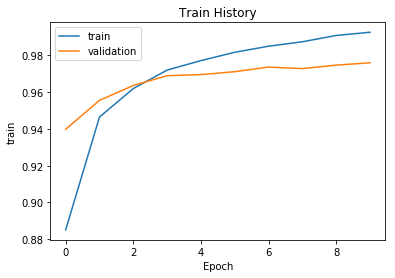

In [19]:
show_train_history(train_history,'accuracy','val_accuracy')

In [20]:
"""
overfitting
訓練過程太久或例子太少，導致過度適應訓練資料中特化且隨機的特徵，雖然在訓練時準確率高，但是用未知資料的計算準確率低
"""

'\noverfitting\n訓練過程太久或例子太少，導致過度適應訓練資料中特化且隨機的特徵，雖然在訓練時準確率高，但是用未知資料的計算準確率低\n'

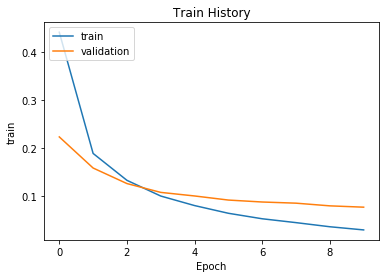

In [21]:
show_train_history(train_history,'loss','val_loss')

In [22]:
#模型準確率
scores = model.evaluate(x_test_normalize,y_test_onehot)
print('accuracy',scores[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0697 - accuracy: 0.9783
accuracy 0.9782999753952026


In [25]:
#預測
prediction = np.argmax(model.predict(x_test), axis=-1)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [26]:
def plot_image_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25:
        num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])
        
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

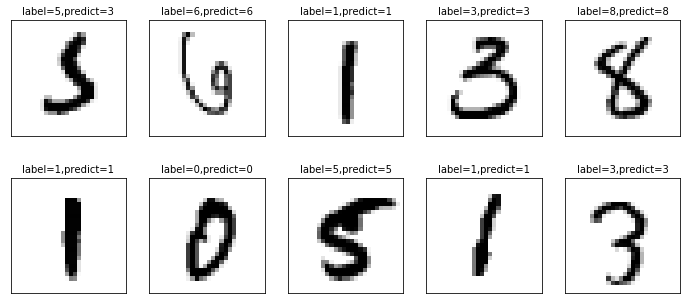

In [27]:
plot_image_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [28]:
#混淆矩陣
import pandas as pd
pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,968,0,1,1,2,0,3,1,2,2
1,0,1124,4,0,0,1,3,0,3,0
2,5,1,1005,5,1,0,3,7,4,1
3,0,0,1,994,0,4,0,3,2,6
4,1,0,2,1,957,0,5,2,1,13
5,5,0,0,9,1,864,7,1,4,1
6,4,3,0,1,2,4,943,0,1,0
7,0,3,6,5,0,0,0,1006,1,7
8,3,0,3,8,2,4,4,3,943,4


In [31]:
#查看dataframe
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2810,5,3
3902,5,3
5937,5,3
5972,5,3


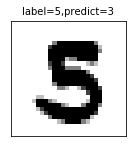

In [33]:
plot_image_labels_prediction(x_test_image,y_test_label,prediction,idx=1003,num = 1)